In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
data_summary = pd.read_csv('data/atussum_2014.dat')



In [3]:
from summary_files import *
data_summary = data_summary.rename(columns=renamed_cols)

In [4]:
atus_who = pd.read_csv('data/atuswho_2014.dat')

activity = pd.read_csv('data/atusact_2014.dat')

cps = pd.read_csv('data/atuscps_2014.dat')

resp = pd.read_csv('data/atusresp_2014.dat')

rost = pd.read_csv('data/atusrost_2014.dat')

rostec = pd.read_csv('data/atusrostec_2014.dat')



In [5]:
data_summary.head()

,case_id,stat_weight,age_youngest_child,age,sex,high_levl_edu,race,hisp,metro,labor_status,...,Travel related to phone calls,"Travel rel. to phone calls, n.e.c.*",Security procedures related to traveling,"Security procedures related to traveling, n.e.c.*","Traveling, n.e.c.*",Insufficient detail in verbatim,Missing travel or destination,Respondent refused to provide information/'none of your business',Gap/can't remember,Unable to code activity at 1st tier
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [6]:
[x for x in data_summary.keys()]

['case_id',
 'stat_weight',
 'age_youngest_child',
 'age',
 'sex',
 'high_levl_edu',
 'race',
 'hisp',
 'metro',
 'labor_status',
 'more_1_job_7_days',
 'ft_pt',
 'school_enrolled',
 'hs_or_col',
 'spouse_present',
 'spouse_employed',
 'weekly_earnings',
 'num_of_children',
 'spouse_ft_pt',
 'weekly_hours',
 'interview_day_of_week',
 'interview_on_holiday',
 'eldercare_time_spent',
 'childcare_time_spent',
 'Sleeping',
 'Sleeplessness',
 'Washing, dressing and grooming oneself',
 'Grooming, n.e.c.*',
 'Health-related self care',
 'Self care, n.e.c.*',
 'Personal/Private activities',
 'Personal emergencies',
 'Personal Care, n.e.c.*',
 'Interior cleaning',
 'Laundry',
 'Sewing, repairing, & maintaining textiles',
 'Storing interior hh items, inc. food',
 'Housework, n.e.c.*',
 'Food and drink preparation',
 'Food presentation',
 'Kitchen and food clean-up',
 'Interior arrangement, decoration, & repairs',
 'Building and repairing furniture',
 'Heating and cooling',
 'Interior maintenance

In [7]:
data_summary = data_summary.replace(-1, np.nan)


In [8]:
total_participants = data_summary[['case_id','age', 'sex']]
male = total_participants[total_participants.sex == 1]  # Male = 1
female = total_participants[total_participants.sex == 2]  # Female = 2

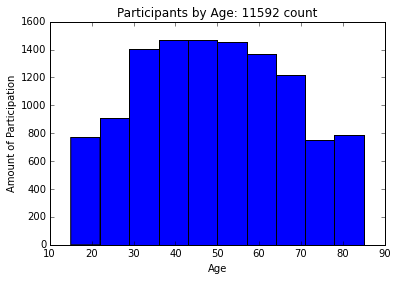

In [9]:
total_participants['age'].plot(kind='hist')
plt.title("Participants by Age: {} count".format(total_participants['case_id'].count()))
plt.ylabel("Amount of Participation")
plt.xlabel("Age")
plt.show()

#The largest group of participants are in the 35 - 50 range

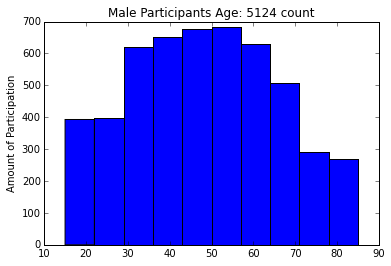

In [10]:
male['age'].plot(kind='hist')
plt.title("Male Participants Age: {} count".format(male['age'].count()))
plt.ylabel("Amount of Participation")
plt.show()

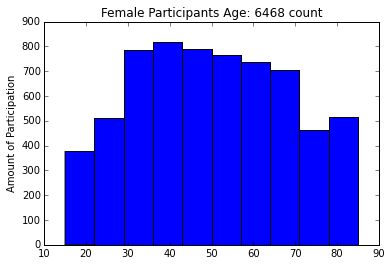

In [11]:
female['age'].plot(kind='hist')
plt.title("Female Participants Age: {} count".format(female['age'].count()))
plt.ylabel("Amount of Participation")
plt.show()

In [12]:
 data_summary[['case_id','Running', 'sex']].sum()

case_id    233470449938283489
Running                  8707
sex                     18060
dtype: int64

In [13]:
total_runners = data_summary[['Running', 'sex']]
male_runners = total_runners[total_runners.sex == 1]
female_runners = total_runners[total_runners.sex == 2]

In [14]:
male_runners.sum()



Running    4703
sex        5124
dtype: int64

In [15]:
female_runners.sum()

Running     4004
sex        12936
dtype: int64

In [16]:
total_runners.sum()

Running     8707
sex        18060
dtype: int64

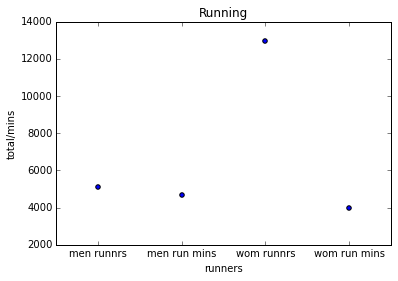

In [17]:
x1 = ["men runnrs", "men run mins", "wom runnrs", "wom run mins"]
y1 = [5124, 4703, 12936, 4004]
plt.scatter(range(4), y1)
plt.xticks(range(4), x1)
plt.xlabel("runners")
plt.ylabel("total/mins")
plt.title("Running")
plt.show()

# Women runners vs Men runners
In the chart above, we see that there are a lot more woman runners, however they do not run as manyy minutes as their male counterparts 

In [18]:
data_summary[[ 'Running', 'Walking', 'Biking']].sum()

Running     8707
Walking    36576
Biking      5863
dtype: int64

In [19]:
active = data_summary[[ 'Running', 'Walking', 'Biking',]].sum()

# Running, Walking, or Biking?
This graph shows the popular choice of basic excercise.  Of course, its WALKING! Followed by running. I would love to think this is because Americans "love their walking/running", and are truly behind the "foot to the pavement" moement.  However, I'm sure its because the equipment needed is minimal.  Shoes... thats it... thats all you need.  Go Figure...

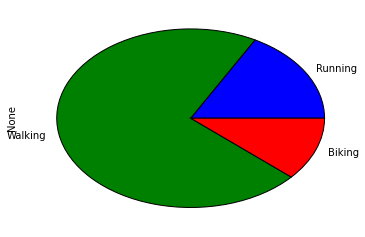

In [20]:
active.plot(kind ='pie')
plt.show()

In [21]:
data_summary[['Reading to/with hh children', 'Playing with hh children, not sports', 'Arts and crafts with hh children', 'Playing sports with hh children', 'Talking with/listening to hh children', 'Homework (hh children)']].sum()

Reading to/with hh children              12909
Playing with hh children, not sports     88423
Arts and crafts with hh children          1232
Playing sports with hh children           3297
Talking with/listening to hh children    14410
Homework (hh children)                   25641
dtype: int64

In [22]:
child_time = data_summary[['Reading to/with hh children', 'Playing with hh children, not sports', 'Arts and crafts with hh children', 'Playing sports with hh children', 'Talking with/listening to hh children', 'Homework (hh children)']].sum()

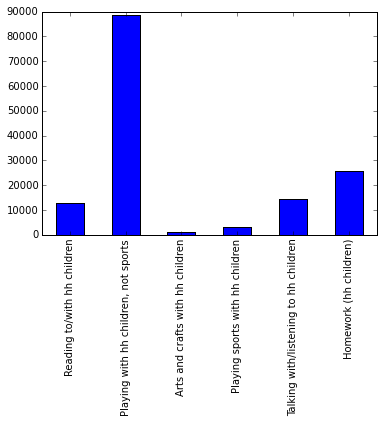

In [23]:
child_time.plot(kind = 'bar')
plt.show()

# Time with the kids

The above chart show the anout of time spent wth kids in the household.  I think this could be a little misleading.  I'm going to assume all this time spent playing with kids and not sports could mean a lot of things...  Video games perhaps? Nerf Gun Wars (my personal favorite)?  However, I am pleased to see the amout of time spent reading and doing homework with kids.  Way to go America! Wish I could believe you...

# Let's explore the time that is spent reading with kids.  Employed vs Unemployed.

In [24]:
unemployed = (data_summary.labor_status >= 3)
employed = (data_summary.labor_status <= 2)

In [25]:
unemployed = data_summary[unemployed]
employed = data_summary[employed]

In [26]:
unemp_reading = unemployed[['Reading to/with hh children']]
emp_reading = employed[['Reading to/with hh children']]

In [27]:
unemp_reading.sum()

Reading to/with hh children    4189
dtype: int64

In [28]:
emp_reading.sum()

Reading to/with hh children    8720
dtype: int64

In [29]:
read_to_child = pd.DataFrame([unemp_reading.sum(), emp_reading.sum()])

In [30]:
read_to_child.columns = ["Minutes reading to/with Child"]
read_to_child.index = ["Unemployed", "Employed"]
read_to_child

,Minutes reading to/with Child
Unemployed,4189
Employed,8720


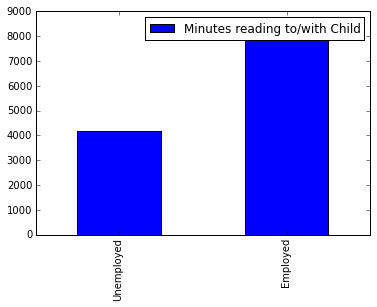

In [31]:
read_to_child.plot(kind='bar')
plt.show()

## Read to/with the children
It seems that UNEMPLOYED parents read to/with their kids a lot less than EMPLOYED parents.  This is odd because one would think that the unemployed would have more time to do these things...  especially helping your child with their reading.  However, this is just a total, so the numbers could be misleading.  The Employed could simply just have more kids, which would explain why they spend more time reading to the children.

In [32]:
cleaning = data_summary[["Interior cleaning", 'Exterior cleaning']]

In [33]:
cleaning.sum()

Interior cleaning    276609
Exterior cleaning     23438
dtype: int64

In [34]:
cleaning= cleaning.sum()

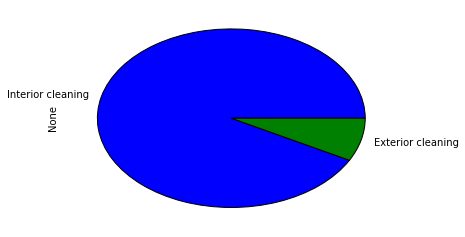

In [35]:
cleaning.plot(kind = 'pie')
plt.show()

In [36]:
int_cleaning = data_summary[[
 'Laundry',
 'Sewing, repairing, & maintaining textiles',
 'Storing interior hh items, inc. food',
 'Housework, n.e.c.*',
 'Food and drink preparation',
 'Food presentation',
 'Kitchen and food clean-up',
 'Interior arrangement, decoration, & repairs',
 'Building and repairing furniture',
 'Heating and cooling',
 'Interior maintenance, repair, & decoration, n.e.c.*',]]

In [37]:
int_cleaning.sum()

Laundry                                                140492
Sewing, repairing, & maintaining textiles               19804
Storing interior hh items, inc. food                    15926
Housework, n.e.c.*                                        450
Food and drink preparation                             342536
Food presentation                                        5006
Kitchen and food clean-up                               92830
Interior arrangement, decoration, & repairs             38622
Building and repairing furniture                         5823
Heating and cooling                                      6928
Interior maintenance, repair, & decoration, n.e.c.*       495
dtype: int64

In [38]:
int_cleaning = int_cleaning.sum()

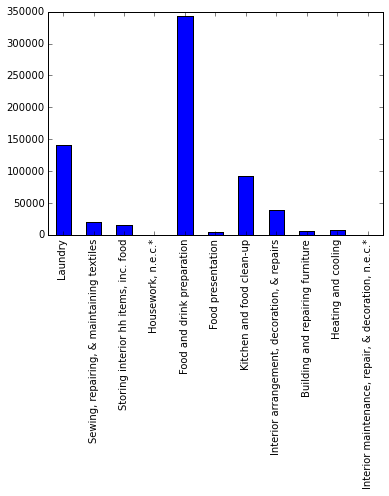

In [39]:
int_cleaning.plot(kind='bar')
plt.show()

In [40]:
ext_cleaning = data_summary[['Exterior repair, improvements, & decoration',
 'Exterior maintenance, repair & decoration, n.e.c.*',
 'Lawn, garden, and houseplant care',
 'Ponds, pools, and hot tubs',
 'Lawn and garden, n.e.c.*',]]

In [41]:
ext_cleaning.sum()

Exterior repair, improvements, & decoration            16185
Exterior maintenance, repair & decoration, n.e.c.*       268
Lawn, garden, and houseplant care                     141062
Ponds, pools, and hot tubs                              2443
Lawn and garden, n.e.c.*                                   5
dtype: int64

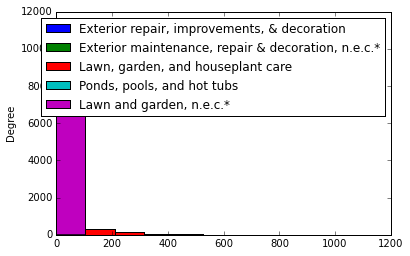

In [42]:
ext_cleaning.plot(kind='hist')
plt.show()